## Universal Variance Decomposition

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt

In [44]:
dataset_list = ["MDTB", "Language", "WMFS", "Demand", "Somatotopic", "Nishimoto"]
logalpha_list = [8, 8, 8, 8, 8, 10]

# Load the product matrix and metadata vectors 
data = np.load("/home/UWO/ashahb7/Github/bayes_temp/product_matrix.npz", allow_pickle=True)
indices = []
for ds, la in zip(dataset_list, logalpha_list):
    indices.append(np.where((data['dataset_vec'] == ds) & (data['logalpha_vec'] == la))[0])
indices = np.concatenate(indices)
product_la = data['product_matrix'][np.ix_(indices, indices)]
dataset_vec_la = data['dataset_vec'][indices]
sub_vec_la = data['sub_vec'][indices]
part_vec_la = data['part_vec'][indices]

# Solve
var_decomp_df = rm.decompose_variance_from_SS_2(product_la, dataset_vec_la, sub_vec_la, part_vec_la)

Bad pairs (cross-dataset): 8.84%
Bad pairs (cross-subject): 0.79%
Bad pairs (cross-partition): 0.93%
Bad pairs (same-partition): 0.00%


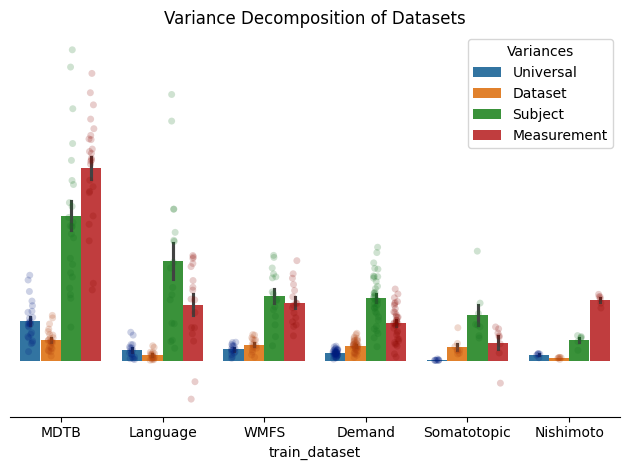

In [47]:
vars = ['v_u', 'v_d', 'v_s', 'v_m']
decom_df = var_decomp_df.copy()
decom_df['v_m'] /= 2
decom_df[vars] = decom_df[vars].mul(decom_df['sc']**2, axis=0)
df_decom_melt = decom_df.melt(id_vars=['train_dataset'], value_vars=vars, var_name='Variances', value_name='value')

ax = sns.barplot(df_decom_melt, x='train_dataset', y='value', hue='Variances', errorbar='se')
sns.stripplot(df_decom_melt, x='train_dataset', y='value', hue='Variances', dodge=True, palette='dark', alpha=0.2, marker='o')

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles=handles, labels=['Universal', 'Dataset', 'Subject', 'Measurement'], title='Variances')
ax.set_yticks([])
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title('Variance Decomposition of Datasets')
plt.tight_layout()

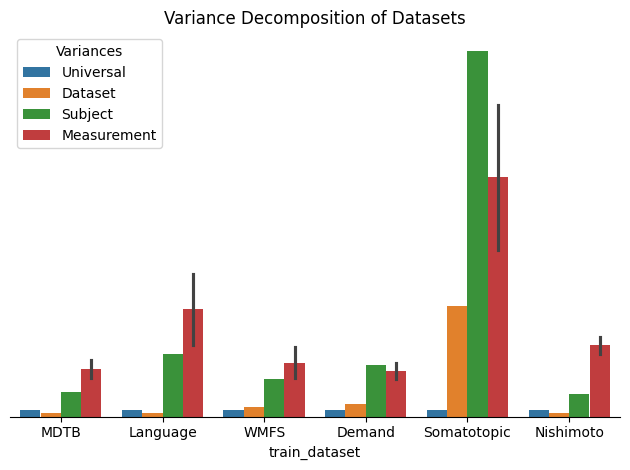

In [29]:
vars = ['v_u', 'v_d', 'v_s', 'v_m']
decom_df = var_decomp_df[['train_dataset', 'v_u', 'v_d', 'v_s', 'v_m']].copy()
decom_df['v_m'] /= 2
df_decom_melt = decom_df.melt(id_vars=['train_dataset'], value_vars=vars, var_name='Variances', value_name='value')

ax = sns.barplot(df_decom_melt, x='train_dataset', y='value', hue='Variances', errorbar='se')

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles=handles, labels=['Universal', 'Dataset', 'Subject', 'Measurement'], title='Variances')
ax.set_yticks([])
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title('Variance Decomposition of Datasets')
plt.tight_layout()